In [ ]:
!pip install -q lifelines

     |████████████████████████████████| 349 kB 4.4 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from pathlib import Path
from matplotlib import rcParams
from lifelines import KaplanMeierFitter, CoxPHFitter
from scipy.stats import mannwhitneyu, zscore
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [ ]:
drive.mount("/content/drive")
DATA = Path("/content/drive/My Drive/ecbm_4060") # change to be correct data dir

rcParams.update({'font.size': 22})

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_colwidth', None)

Mounted at /content/drive


In [ ]:
rna_df = pd.read_csv(DATA / "melanoma_bulk_rna.tsv", sep="\t", index_col=0)
rna_df = rna_df.T
rna_df

GENE,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,A4GALT,A4GNT,AA06,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL2-AS1,AADACL3,AADACL4,AADACP1,AADAT,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,...,ZSCAN5B,ZSCAN5C,ZSCAN5DP,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM5P1,ZSWIM5P2,ZSWIM5P3,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
YUFURL,4.457630,0.704762,0.000000,73.456122,5.588453,0.013621,0.0,0.0,0.000000,0.231390,0.013567,0.000000,0.0,30.203303,3.465412,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,28.994528,65.128965,4.130899,45.268926,2.348345,5.294025,0.000000,...,0.037600,0.000000,0.000000,3.045571,1.867155,0.000000,0.714696,1.124353,0.264902,0.0,0.000000,0.000000,15.783376,9.353771,125.302128,1.289066,1.396486,5.097103,3.693145,7.111109,1.256295,2.671083,2.463456,20.764592,0.007245,0.0,8.265461,111.091873,0.0,88.815581
YUTORY,2.306715,0.237413,0.098195,45.350559,5.007754,0.019655,0.0,0.0,0.007442,2.370648,0.035203,0.000000,0.0,25.719953,3.368934,0.0,0.000000,0.038116,0.000000,0.023587,0.048062,0.0,0.000,19.072751,45.195625,3.839759,29.117862,3.278716,2.831114,0.000000,...,0.081239,0.036817,0.036935,3.192050,1.595056,0.000000,0.529636,5.750355,0.212056,0.0,0.000000,0.000000,12.725232,5.552343,104.417814,2.587139,0.582608,4.152432,1.697800,3.103448,0.267998,1.714233,1.534827,19.275500,0.010022,0.0,9.233628,128.049336,0.0,78.226161
YUHERN,4.863947,0.393938,0.018893,25.833588,2.357249,0.003801,0.0,0.0,0.000000,0.300593,0.000000,0.007604,0.0,22.089093,1.619411,0.0,0.037725,0.000000,0.000000,0.000000,0.000000,0.0,0.000,24.388835,48.371986,5.619245,30.356992,2.430745,4.565340,0.000000,...,0.006158,0.000000,0.006979,2.230218,2.439670,0.000000,0.491354,1.245899,0.303398,0.0,0.000000,0.000000,11.277240,6.572922,113.153565,1.582381,0.639106,3.088358,2.835199,4.292529,0.409473,2.868068,3.315318,14.285110,0.022246,0.0,9.698406,133.084862,0.0,72.168727
YUROD,4.362583,0.587026,0.000000,7.748999,0.860022,0.000000,0.0,0.0,0.000000,0.000000,0.019182,0.000000,0.0,25.807670,3.003917,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,21.255600,17.526270,3.319187,30.157076,1.783639,3.482501,0.000000,...,0.000000,0.000000,0.000000,2.646776,2.265614,0.000000,0.790333,1.036257,0.206381,0.0,0.000000,0.000000,2.702770,6.000027,49.284798,0.143269,1.191327,3.349854,3.167096,4.921326,0.197380,6.434645,3.079840,7.474719,0.119705,0.0,4.116792,24.974925,0.0,34.535087
YUALOE,3.439856,0.425090,0.068634,21.425716,0.841542,0.059099,0.0,0.0,0.007083,0.048333,0.076951,0.004352,0.0,32.815110,4.981549,0.0,0.053108,0.000000,0.014536,0.000000,0.000000,0.0,0.000,29.044268,41.771579,4.462572,47.362182,1.168940,4.274779,0.027141,...,0.003502,0.012111,0.067306,3.545402,1.468738,0.038788,0.447259,0.976954,0.144760,0.0,0.003055,0.004331,8.023767,14.738641,49.803130,0.511008,0.951247,4.043745,3.160883,5.425542,0.278244,1.597657,1.354551,7.053403,0.014869,0.0,5.986379,105.081744,0.0,45.069868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H-1,9.309458,0.614599,0.000000,18.075761,1.864449,0.314977,0.0,0.0,0.000000,0.456734,0.000000,0.068109,0.0,33.831239,3.391068,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,32.402555,51.014871,3.099267,69.598081,1.261357,6.468442,0.000000,...,0.000000,0.000000,0.000000,3.474497,1.630800,0.000000,0.393987,1.311768,0.153716,0.0,0.000000,0.000000,14.554003,12.874301,64.345869,2.121731,0.970952,4.121777,4.200399,9.035233,0.442667,3.527083,3.148864,17.015206,0.114085,0.0,7.402061,139.960795,0.0,54.307446
H-2,11.859354,0.301318,0.000000,83.405144,5.768096,0.034580,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,32.935879,3.411765,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,34.863024,54.109778,2.319240,58.257490

In [ ]:
clin_df = pd.read_csv(DATA / "clinical_melanoma_bulk.csv", index_col = 0)
clin_df

,age,sex,type,treatment,prior_treatment,ae_grade,severe_ae,time_to_event,site,gi,response
ptid,,,,,,,,,,,
YUHEAL,51,Male,Sun-exposed,Combination,Yes,4,1,2.86,liver,0,DCB
YUBAIX,46,Male,Sun-exposed,Combination,No,3,1,2.43,liver,0,DCB
YUDONA,72,Male,Sun-exposed,Combination,No,3,1,1.38,liver,0,DCB
YUKEID,35,Female,Indeterminate,Combination,No,3,1,0.56,GI,1,NE
YURADIO,71,Male,Indeterminate,Combination,No,3,1,2.66,GI,1,DCB
YUBRET,69,Male,Sun-exposed,Anti-PD1,No,2,0,52.67,"pituitary, adrenal",0,DCB
YUCUSK,75,Female,Ocular/Uveal,Anti-PD1,No,2,0,9.13,skin,0,NDB
YUGIM,69,Male,Sun-exposed,Combination,No,2,0,49.25,"liver, systemic",0,DCB
YUGRUE,55,Male,Sun-exposed,Combination,No,2,0,44.85,liver,0,DCB


In [ ]:
tox_df = rna_df[["TOX"]]
tox_threshold = np.percentile(tox_df["TOX"], 70)
tox_threshold

3.0051855

In [ ]:
tox_df = tox_df.merge(clin_df, left_index=True, right_index=True)
tox_df["high_tox"] = tox_df["TOX"] >= tox_threshold
tox_df

,TOX,age,sex,type,treatment,prior_treatment,ae_grade,severe_ae,time_to_event,site,gi,response,high_tox
YUHEAL,1.981070,51,Male,Sun-exposed,Combination,Yes,4,1,2.86,liver,0,DCB,False
YUBAIX,0.993381,46,Male,Sun-exposed,Combination,No,3,1,2.43,liver,0,DCB,False
YUDONA,0.897146,72,Male,Sun-exposed,Combination,No,3,1,1.38,liver,0,DCB,False
YUKEID,3.557890,35,Female,Indeterminate,Combination,No,3,1,0.56,GI,1,NE,True
YURADIO,2.433306,71,Male,Indeterminate,Combination,No,3,1,2.66,GI,1,DCB,False
YUBRET,2.100820,69,Male,Sun-exposed,Anti-PD1,No,2,0,52.67,"pituitary, adrenal",0,DCB,False
YUCUSK,1.595996,75,Female,Ocular/Uveal,Anti-PD1,No,2,0,9.13,skin,0,NDB,False
YUGIM,0.757431,69,Male,Sun-exposed,Combination,No,2,0,49.25,"liver, systemic",0,DCB,False
YUGRUE,1.072997,55,Male,Sun-exposed,Combination,No,2,0,44.85,liver,0,DCB,False
YUMAXI,2.082456,80,Male,Sun-exposed,Anti-PD1,No,2,0,8.64,skin,0,DCB,False


In [ ]:
tox_df["event"] = tox_df["response"] != "DCB"

In [ ]:
cph = CoxPHFitter()
cph.fit(tox_df[["high_tox", "time_to_event", "event"]], duration_col='time_to_event', event_col='event')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
high_tox,0.859983,2.363121,0.407051,0.062178,1.657788,1.064152,5.247691,0.0,2.112717,0.034625,4.852042


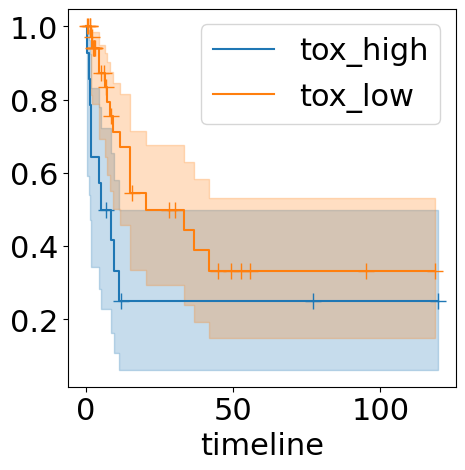

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

tox_high_idx = tox_df["high_tox"]

kmf.fit(tox_df.time_to_event[tox_high_idx], tox_df.event[tox_high_idx],
        label="tox_high")
kmf.plot(ax=ax, show_censors=True)
kmf.fit(tox_df.time_to_event[~tox_high_idx], tox_df.event[~tox_high_idx],
        label="tox_low")
kmf.plot(ax=ax, show_censors=True)

In [ ]:
tox_df['tox_level'] = np.where(tox_df["high_tox"], "High TOX", "Low TOX")
tox_df['response_grouped'] = np.where(tox_df["response"].isin(["DCB"]), "Responder", "Non-responder")
tox_df['tox_z'] = zscore(tox_df["TOX"]) - 0.524

Text(0, 0.5, 'Response to anti-PD-1')

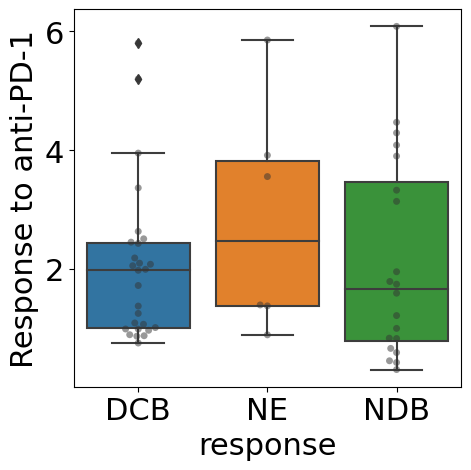

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

sns.boxplot(x="response", y="TOX", data=tox_df, ax=ax)
sns.swarmplot(x="response", y="TOX", data=tox_df, color=".2", alpha=0.5, ax=ax)
ax.set_ylabel("TOX Expression Level")
ax.set_ylabel("Response to anti-PD-1")


Text(0.5, 0, 'Response to anti-PD-1')

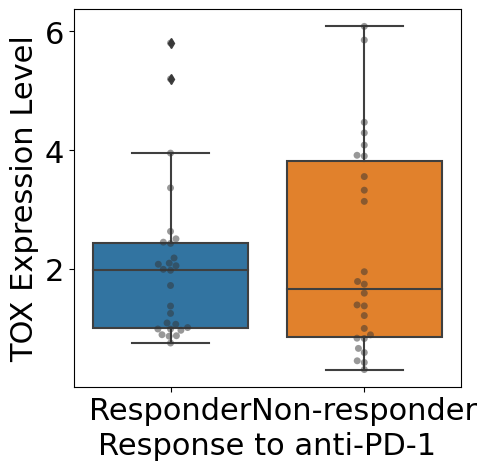

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

sns.boxplot(x="response_grouped", y="TOX", data=tox_df, ax=ax)
sns.swarmplot(x="response_grouped", y="TOX", data=tox_df, color=".2", alpha=0.5, ax=ax)
ax.set_ylabel("TOX Expression Level")
ax.set_xlabel("Response to anti-PD-1")

In [ ]:
mannwhitneyu(tox_df.loc[tox_df.response_grouped == "Responder", "TOX"],
             tox_df.loc[tox_df.response_grouped == "Non-responder", "TOX"])

MannwhitneyuResult(statistic=358.0, pvalue=0.9079314315593642)

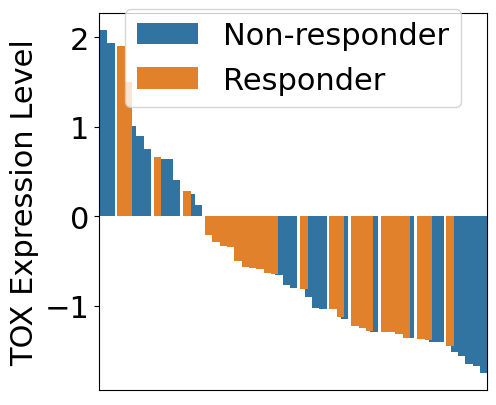

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(5, 5))

sns.barplot(
    x=np.arange(len(tox_df)), 
    y="tox_z", 
    hue="response_grouped",
    data=tox_df.sort_values("tox_z", ascending=False), 
    ax=ax, 
    ci=None
)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel("TOX Expression Level")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05))

for bar in ax.patches:
    bar.set_width(1)

In [ ]:
trainX, testX, trainY, testY = train_test_split(
    np.array(tox_df["TOX"]).reshape(-1, 1),
    tox_df["event"].astype("int32"), 
    test_size=0.5, 
    random_state=0
)
model = PoissonRegressor().fit(trainX, trainY)
pred = model.predict(testX)
fpr, tpr, thresholds = roc_curve(testY, pred)

In [ ]:
print(fpr, tpr)

[0.         0.         0.         0.13333333 0.13333333 0.53333333
 0.53333333 0.6        0.6        0.93333333 0.93333333 1.
 1.        ] [0.         0.08333333 0.16666667 0.16666667 0.25       0.25
 0.41666667 0.41666667 0.58333333 0.58333333 0.75       0.75
 1.        ]


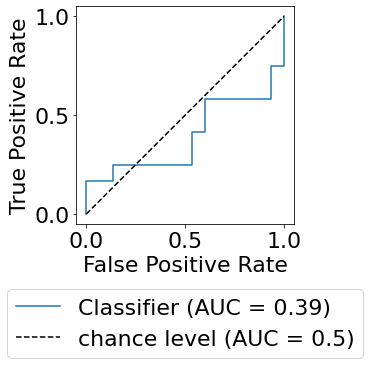

In [ ]:
RocCurveDisplay.from_predictions(
    testY,
    pred
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.25))

plt.show()
